In [1]:
import matplotlib.pyplot as plt

import numpy as np #importa a biblioteca usada para trabalhar com vetores e matrizes
import pandas as pd #importa a biblioteca usada para trabalhar com dataframes
import util

#importa o arquivo e guarda em um dataframe do Pandas
df_dataset = pd.read_csv( 'datasets/everything.csv', sep=',', index_col=None, header=0)

display(df_dataset.head(n=6))

,TWEET,CLASS
0,@tweetmee lol atleast i have csgo and archeage...,1
1,@ryuuboruzdota @draskyl @archeage go back to w...,-1
2,@toffees_dota2 @ryuuboruzdota @draskyl @archea...,-1
3,like sooooooooooo excited to play archeage. my...,1
4,@emeldavi_dota @toffees_dota2 @ryuuboruzdota @...,-1
5,had a amazing night with u guys thx to all my ...,1


In [2]:
#pega os valores das n-1 primeiras colunas e guarda em uma matrix X
X = df_dataset['TWEET'].values

#pega os valores da última coluna e guarda em um vetor Y
Y = df_dataset['CLASS'].values.astype(int)
Y = np.where(Y != -1, Y, 0)
Y = np.where(Y != 1, Y, 1)

display(Y)

array([1, 0, 0, ..., 1, 0, 1])

In [18]:
#limpa e tokeniza os tweets
cleaned_tweets = util.tweets_cleaner(X)
#constrói o vocabulário
vocab = util.build_vocab(cleaned_tweets)
#constrói o vetor de features para cada tweet
Xfeatures = np.array(util.build_representation(cleaned_tweets, vocab))
#f = util.build_features(X[1067], vocab)
#print(Y.shape)

[ 301  455 1689 ... 2557  317 2604]


In [26]:
pVitoria = sum(Y==1)/len(Y) 
pDerrota = sum(Y==0)/len(Y)

def calcularProbabilidades(X, Y):
    """
    CALCULARPROBABILIDADES Computa a probabilidade de ocorrencia de cada 
    atributo por rotulo possivel. A funcao retorna dois vetores de tamanho n
    (qtde de atributos), um para cada classe.
    
    CALCULARPROBABILIDADES(X, Y) calcula a probabilidade de ocorrencia de cada atributo em cada classe. 
    Cada vetor de saida tem dimensao (n x 1), sendo n a quantidade de atributos por amostra.
    """
    
    #  inicializa os vetores de probabilidades
    pAtrVitoria = np.zeros(X.shape[1])
    pAtrDerrota = np.zeros(X.shape[1])

    ########################## COMPLETE O CÓDIGO AQUI  ########################
    #  Instrucoes: Complete o codigo para encontrar a probabilidade de
    #                ocorrencia de um atributo para uma determinada classe.
    #                Ex.: para a classe 1 (vitoria), devera ser computada um
    #                vetor pAtrVitoria (n x 1) contendo n valores:
    #                P(Atributo1=1|Classe=1), ..., P(Atributo5=1|Classe=1), e o
    #                mesmo para a classe 0 (derrota):
    #                P(Atributo1=1|Classe=0), ..., P(Atributo5=1|Classe=0).
    # 


    pAtrVitoria = (np.matmul(Y, X) + 1)/(sum(Y==1) + len(X))
    pAtrDerrota = (np.matmul(1 - Y, X) + 1)/(sum(Y==0) + len(X))
    ##########################################################################

    return pAtrVitoria, pAtrDerrota

pAtrVitoria, pAtrDerrota = calcularProbabilidades(Xfeatures,Y)

In [35]:
def classificacao(X,pVitoria,pDerrota,pAtrVitoria,pAtrDerrota):
    """
    Classifica se a entrada x pertence a classe 0 ou 1 usando
    as probabilidades extraidas da base de treinamento. Essa funcao 
    estima a predicao de x atraves da maior probabilidade da amostra  
    pertencer a classe 1 ou 0. Tambem retorna as probabilidades condicionais
    de vitoria e derrota, respectivamente.
    
    """

    #  inicializa a classe e as probabilidades condicionais
    classe = [];
    probVitoria= 0;
    probDerrota = 0;

    ########################## COMPLETE O CÓDIGO AQUI  ########################
    #  Instrucoes: Complete o codigo para estimar a classificacao da amostra
    #                usando as probabilidades extraidas da base de treinamento.
    #                Voce precisara encontrar as probabilidades Bayesianas 
    #                probVitoria p(classe=1|x) e probDerrota p(classe=0|x) e
    #                selecionar a maior.
    # 
                
    
    for x in X:
        probVitoria = pVitoria * np.prod(pAtrVitoria * (x > 0) ** x + (1 - pAtrVitoria) * (x < 1) ** x)
        probDerrota = pDerrota * np.prod(pAtrDerrota * (x > 0) ** x + (1 - pAtrDerrota) * (x < 1) ** x)
        if probVitoria < probDerrota:
            classe.append(0)
        else:
            classe.append(1)
    
    
    classe = np.array(classe)
    
    
    
    
    
    
    

    ########################################################################## 

    return classe, probVitoria, probDerrota 

resultados = np.zeros( Xfeatures.shape[0] )
resultados, probVitoria, probDerrota = classificacao( Xfeatures,pVitoria,pDerrota,pAtrVitoria,pAtrDerrota )

# calcular acuracia
acuracia = np.sum(resultados==Y)/len(Y)

print(acuracia)

0.9202741702741702


Numero de dados de validação: 444
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
27

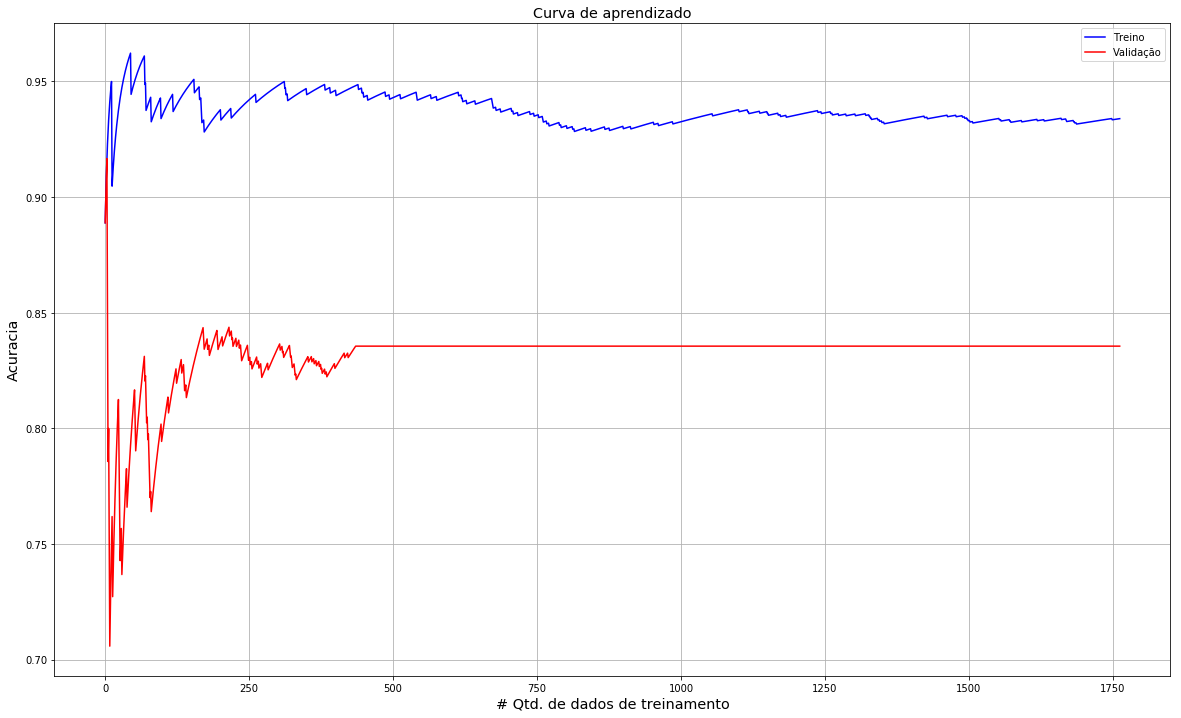

In [38]:
# semente usada na randomizacao dos dados.
randomSeed = 10 

# gera os indices aleatorios que irao definir a ordem dos dados
idx_perm = np.random.RandomState(randomSeed).permutation(range(len(Y)))

# ordena os dados de acordo com os indices gerados aleatoriamente
Xk, Yk = Xfeatures[idx_perm, :], Y[idx_perm]

# define a porcentagem de dados que irao compor o conjunto de treinamento
pTrain = 0.8 

# obtem os indices dos dados da particao de treinamento e da particao de teste
train_index, test_index = util.stratified_holdOut(Yk, pTrain)

X_train, X_test = Xk[train_index, :], Xk[test_index, :];
Y_train, Y_test = Yk[train_index], Yk[test_index];

train_index, val_index = util.stratified_holdOut(Y_train, pTrain)

X_train_v, X_val = X_train[train_index, :], X_train[val_index, :]
Y_train_v, Y_val = Y_train[train_index], Y_train[val_index]

print('Numero de dados de validação: %d' %(X_val.shape[0]))

def curva_aprendizado(X, Y, Xval, Yval):
    """
    Funcao usada gerar a curva de aprendizado.
  
    Parametros
    ----------
  
    X : matriz com os dados de treinamento
  
    Y : vetor com as classes dos dados de treinamento
  
    Xval : matriz com os dados de validação
  
    Yval : vetor com as classes dos dados de validação
  
    """

    # inicializa as listas que guardarao a performance no treinamento e na validacao
    perf_train = []
    perf_val = []

    # inicializa o parametro de regularizacao da regressao logistica
    lambda_reg = 1
        
    # Configura o numero de interacaoes da regressao logistica
    iteracoes = 500
        
    ########################## COMPLETE O CÓDIGO AQUI  ###############################
    #  Instrucoes: Complete o codigo para gerar o gráfico da curva de aprendizado.
    #           Comece o treinamento com as primeiras 10 amostras da base de dados de 
    #           treinamento e calcule a acuracia do classificador tanto nos dados de
    #           treinamento já apresentados, quando na base de validacao. 
    #           Depois disso, adicione mais um dado para treinamento e calcule novamente 
    #           o desempenho. Continue adicionando um dado por vez ate todos os dados de 
    #           treinamento serem usados. Nas listas perf_train e perf_val, guarde a acuracia 
    #           obtida nos dados de treinamento e na base de validacao a cada nova adicao de 
    #           dados para treinamento.
    
    pVitoria = sum(Y==1)/len(Y) 
    pDerrota = sum(Y==0)/len(Y)
    
    for i in np.arange(9, len(X) - 1):
        print(i)
        pAtrVitoria, pAtrDerrota = calcularProbabilidades(X,Y)
        p, probVitoria, probDerrota = classificacao(X[:i],pVitoria,pDerrota,pAtrVitoria,pAtrDerrota )
        cm = util.get_confusionMatrix(Y[:i], p, [0,1])
        results = util.relatorioDesempenho(cm, [0,1])
        perf_train.append(results['acuracia'])
        # Validação
        p, probVitoria, probDerrota = classificacao(Xval[:i],pVitoria,pDerrota,pAtrVitoria,pAtrDerrota )
        cm = util.get_confusionMatrix(Yval[:i], p, [0,1])
        results = util.relatorioDesempenho(cm, [0,1])
        perf_val.append(results['acuracia'])
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    ##################################################################################
       
    # Define o tamanho da figura 
    plt.figure(figsize=(20,12))

    # Plota os dados
    plt.plot(perf_train, color='blue', linestyle='-', linewidth=1.5, label='Treino') 
    plt.plot(perf_val, color='red', linestyle='-', linewidth=1.5, label='Validação')

    # Define os nomes do eixo x e do eixo y
    plt.xlabel(r'# Qtd. de dados de treinamento',fontsize='x-large') 
    plt.ylabel(r'Acuracia',fontsize='x-large') 

    # Define o título do gráfico
    plt.title(r'Curva de aprendizado', fontsize='x-large')

    # Acrescenta um grid no gráfico
    plt.grid(axis='both')

    # Plota a legenda
    plt.legend()
    
    plt.show()
    
curva_aprendizado(X_train_v, Y_train_v, X_val, Y_val)

In [39]:
# semente usada na randomizacao dos dados.
randomSeed = 10 

# gera os indices aleatorios que irao definir a ordem dos dados
idx_perm = np.random.RandomState(randomSeed).permutation(range(len(Y)))

# ordena os dados de acordo com os indices gerados aleatoriamente
Xk, Yk = Xfeatures[idx_perm, :], Y[idx_perm]

nFolds = 5
classes = [0,1]
folds = util.stratified_kfolds(Yk, nFolds, classes) 

k=1
resultados=[]
for train_index, test_index in folds:
    print('\n-----------\n%d-fold: \n-----------\n' % (k) )

    # se train_index ou test_index forem vazios, interrompe o laco de repeticao
    if len(train_index)==0 or len(test_index)==0: 
        print('\tErro: o vetor com os indices de treinamento ou o vetor com os indices de teste esta vazio')      
        break
        
    totalFold = len(train_index)+len(test_index)

    X_train, X_test = Xk[train_index, :], Xk[test_index, :];
    Y_train, Y_test = Yk[train_index], Yk[test_index];
    
    # separa os dados de treinamento em treinamento e validacao
    pTrain = 0.8
    train_index_v, val_index = util.stratified_holdOut(Y_train, pTrain)

    # chama a função que faz a busca em grade
    #bestRegularization = gridSearch(Xpol_train_v, Y_train_v, Xpol_val, Y_val)

    # executa o treinamento com o melhor parâmetro de regularização encontrado
    pAtrVitoria, pAtrDerrota = calcularProbabilidades(X_train,Y_train)

    # classifica os dados de teste
    Y_pred, probVitoria, probDerrota = classificacao( X_test,pVitoria,pDerrota,pAtrVitoria,pAtrDerrota )
    #Y_pred = predicao(Xpol_test, theta)

    # Compute confusion matrix
    cm = util.get_confusionMatrix(Y_test, Y_pred, classes)

    # Gera o relatório de desempenho
    #print('\n\n\n\t'+"="*50+'\n\tMelhor parametro de regularizacao: %1.6f' %bestRegularization)
    print('\n\tResultado no fold atual usando o melhor parametro encontrado:')
    auxResults = util.relatorioDesempenho(cm, classes, imprimeRelatorio=True)

    # adiciona os resultados do fold atual na lista de resultados
    resultados.append( auxResults ) 
        
    k+=1


-----------
1-fold: 
-----------


	Resultado no fold atual usando o melhor parametro encontrado:

	Revocacao   Precisao   F-medida   Classe
	0.841       0.793      0.816      0
	0.799       0.846      0.822      1
	------------------------------------------------
	0.820       0.820      0.820      Média macro
	0.819       0.819      0.819      Média micro

	Acuracia: 0.819

-----------
2-fold: 
-----------


	Resultado no fold atual usando o melhor parametro encontrado:

	Revocacao   Precisao   F-medida   Classe
	0.875       0.791      0.831      0
	0.789       0.874      0.829      1
	------------------------------------------------
	0.832       0.832      0.832      Média macro
	0.830       0.830      0.830      Média micro

	Acuracia: 0.830

-----------
3-fold: 
-----------


	Resultado no fold atual usando o melhor parametro encontrado:

	Revocacao   Precisao   F-medida   Classe
	0.830       0.820      0.825      0
	0.834       0.843      0.838      1
	---------------------------

In [40]:
print('\nResultado final da classificação:')
util.mediaFolds( resultados, classes )


Resultado final da classificação:

	Revocacao   Precisao   F-medida   Classe
	0.852       0.797      0.823      0
	0.801       0.856      0.827      1
	---------------------------------------------------------------------
	0.826       0.826      0.826      Média macro
	0.825       0.825      0.825      Média micro

	Acuracia: 0.825
